# Homework 01: Python Practice

This is meant to get you up to speed with the level of skill in Python that we expect for BIOS 823. You can use online resources, but avoid copy and paste as you will not learn that way. Instead, try to understand the reference/tutorial/example found, then close the browser and try to re-code it yourself.

**1**. (25 points)

In this exercise, we will practice using Pandas dataframes to explore and summarize a data set `heart`.

This data contains the survival time after receiving a heart transplant, the age of the patient and whether or not the survival time was censored

- Number of Observations - 69
- Number of Variables - 3

Variable name definitions::

- survival - Days after surgery until death
- censors - indicates if an observation is censored. 1 is uncensored
- age - age at the time of surgery

Answer the following questions (5 points each) with respect to the `heart` data set:

- How many patients were censored?
- What is the correlation coefficient between age and survival for uncensored patients? 
- What is the average age for censored and uncensored patients?
- What is the average survival time for censored and uncensored patients under the age of 45?
- What is the survival time of the youngest and oldest uncensored patient?

In [3]:
import statsmodels.api as sm
heart = sm.datasets.heart.load_pandas().data
heart.head(n=6)

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0
5,64.0,1.0,54.6


In [4]:
import numpy as np
from pandasql import PandaSQL

pdsql = PandaSQL()

#- How many patients were censored?
print ('1.', len(heart.loc[heart['censors'] == 0]), 'patients were censored.')

#- What is the correlation coefficient between age and survival for uncensored patients? 
uncensored=heart.loc[heart['censors'] == 1]
print ('2.', round(uncensored['survival'].corr(uncensored['age']),4), 'correlation coefficient between age and survival for uncensored patients.')

#What is the average age for censored and uncensored patients?
print ('3.', round(np.mean(heart.loc[heart['censors'] == 1].age),1),'years is the average age for uncensored patients and',
       round(np.mean(heart.loc[heart['censors'] == 0].age),1),'years for censored patients.')

#What is the average survival time for censored and uncensored patients under the age of 45?
pdsql("SELECT AVG(survival) as average_time FROM heart WHERE age<45 GROUP BY censors")

print ('4.', '712.8 days is the average survival time for censored patients and 169.9 days - for uncensored.')
#What is the survival time of the youngest and oldest uncensored patient?
youngest=pdsql("SELECT survival, min(age) FROM heart WHERE censors=1")
oldest=pdsql("SELECT survival, max(age) FROM heart WHERE censors=1")
print ('5. 228 days is the survival time of the youngest uncensored patient (19.7 years) and 60 days - for the oldest (64.5 years).')

1. 24 patients were censored.
2. 0.0033 correlation coefficient between age and survival for uncensored patients.
3. 48.5 years is the average age for uncensored patients and 41.7 years for censored patients.
4. 712.8 days is the average survival time for censored patients and 169.9 days - for uncensored.
5. 228 days is the survival time of the youngest uncensored patient (19.7 years) and 60 days - for the oldest (64.5 years).


**2**. (25 points)

Build a predictive model to guess the species of an iris flower by its measurements. Split the data set provided into 2/3 training and 1/3 test examples using a random splitting strategy. Fit a `sklearn.neighbors.KNeighborsClassifier` to the training data (you can use the default parameters). Generate the $3 \times 3$ confusion matrix for the model evaluated on the test data.

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Due to the simplicity of the data set, the model accuracy is very high =  0.98


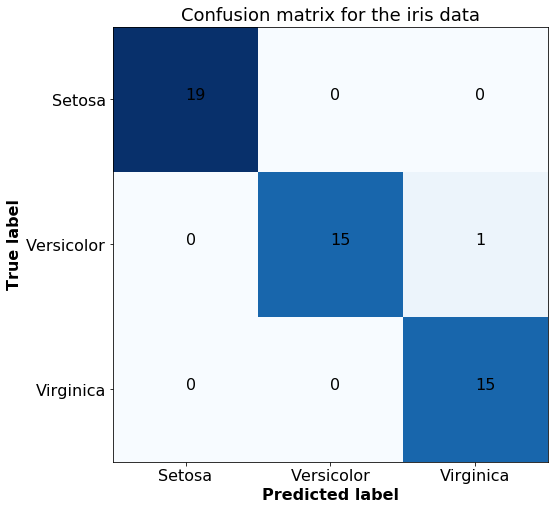

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33) #splitting into train and test
knn = KNeighborsClassifier(n_neighbors=5) #creating knn classifier instance
knn.fit(X_train, y_train) #fitting the data
print ('Due to the simplicity of the data set, the model accuracy is very high = ', knn.score(X_test, y_test))

y_pred=knn.predict(X_test) #predicting the label for the test data
cm=confusion_matrix(y_pred,y_test) #displaying the confusion matrix

plt.figure(figsize = (8,8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
classNames = ['Setosa', 'Versicolor', 'Virginica']
plt.title('Confusion matrix for the iris data',fontsize=18)
plt.ylabel('True label',fontsize=16,fontweight='bold')
plt.xlabel('Predicted label',fontsize=16,fontweight='bold')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0,fontsize=16)
plt.yticks(tick_marks, classNames,fontsize=16)
for i in range(3):
    for j in range(3):
         plt.text(j,i,str(cm[i][j]),fontsize=16)
plt.show()

**3**. (50 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

A plotting function is provided so you only need to code the two functions above.

In [1]:
%matplotlib inline
from matplotlib.ticker import NullFormatter, IndexLocator
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(rule, grid, ax=None):
    """Plot a single grid."""
    
    if ax is None:
        ax = plt.subplot(111)
    with plt.style.context('seaborn-white'):
        ax.grid(True, which='major', color='grey', linewidth=0.5)
        ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
        ax.xaxis.set_major_locator(IndexLocator(1, 0))
        ax.yaxis.set_major_locator(IndexLocator(1, 0))
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_title('Rule %d' % rule)
        
def convert(number):
#Converts decimal number to a binary format.
    if number < 0:
        raise Exception('The rule value should be a positive number not greater than 255. The entered value: {}.'.format(number))
    if number > 255:
        raise Exception('The rule value should be a positive number not greater than 255. The entered value: {}.'.format(number))
        
    bin_number=list(format(number, "08b"))
    bin_number=list(map(int, bin_number))
    
    return bin_number


def set_of_rules(mylist, number):
#Assignes the set of rules for each binary representation.
    bin_number=convert(number)
    
    if mylist==[1,1,1]:
        return bin_number[0]

    if mylist==[1,1,0]:
        return bin_number[1]
    
    if mylist==[1,0,1]:
        return bin_number[2] 
    
    if mylist==[1,0,0]:
        return bin_number[3]
        
    if mylist==[0,1,1]:
        return bin_number[4]
    
    if mylist==[0,1,0]:
        return bin_number[5]
    
    if mylist==[0,0,1]:
        return bin_number[6]
    
    if mylist==[0,0,0]:
        return bin_number[7]

def generating_initial(ncols):
#Creates an initial array (the first row) of the given length.
    if (ncols)<3:
        print ('Error: please enter the value greater than 2')
        return None
    else:
        array=[0]*ncols
        array[ncols//2]=1
        return array

def triples(initial, number):
#The main function: generates a new row based on the set of rules.
    current_list=[]
    main_list=[]
    current_list=[initial[len(initial)-1],initial[0],initial[1]]
    new_row=set_of_rules(current_list, number)
    main_list.append(new_row)
        
    for i in range(1,len(initial)-1):
        current_list=[]
        current_list=[initial[i-1],initial[i],initial[i+1]]
        new_row=set_of_rules(current_list, number)
        main_list.append(new_row)
    
    current_list=[]
    current_list = [initial[len(initial)-2],initial[len(initial)-1],initial[0]]
    new_row=set_of_rules(current_list, number)
    main_list.append(new_row)
    return main_list

def make_array(bin_number, niter, ncols):
#Generates the matrix of the given dimensions (niter and ncols). 
    initial=generating_initial(ncols)
    array=np.empty((niter, ncols))
    array[0,:]=initial
    number=[str(i) for i in bin_number]
    number=''.join(number)
    number=int(number,2)
    for j in range(1,niter):
        row=triples(initial, number)
        array[j,:]=row
        initial=row
        array=np.array(array)
    return array

def rows(rules):
#Defines the optimal number of rows of a figure to display the plots.
    if len(rules)%3==0:
        return len(rules)//3
    else:
        return len(rules)//3+1
    
def make_plots(rules, niter, ncols):
#Plots the rules.

    nrows=rows(rules)
    plt.figure(figsize=(15,20)) 
    for idx, rule in enumerate(rules):
        bin_number=convert(rule)
        data=make_array(bin_number, niter, ncols)
        plot_grid(rule, data, ax = plt.subplot(nrows,3,idx+1))

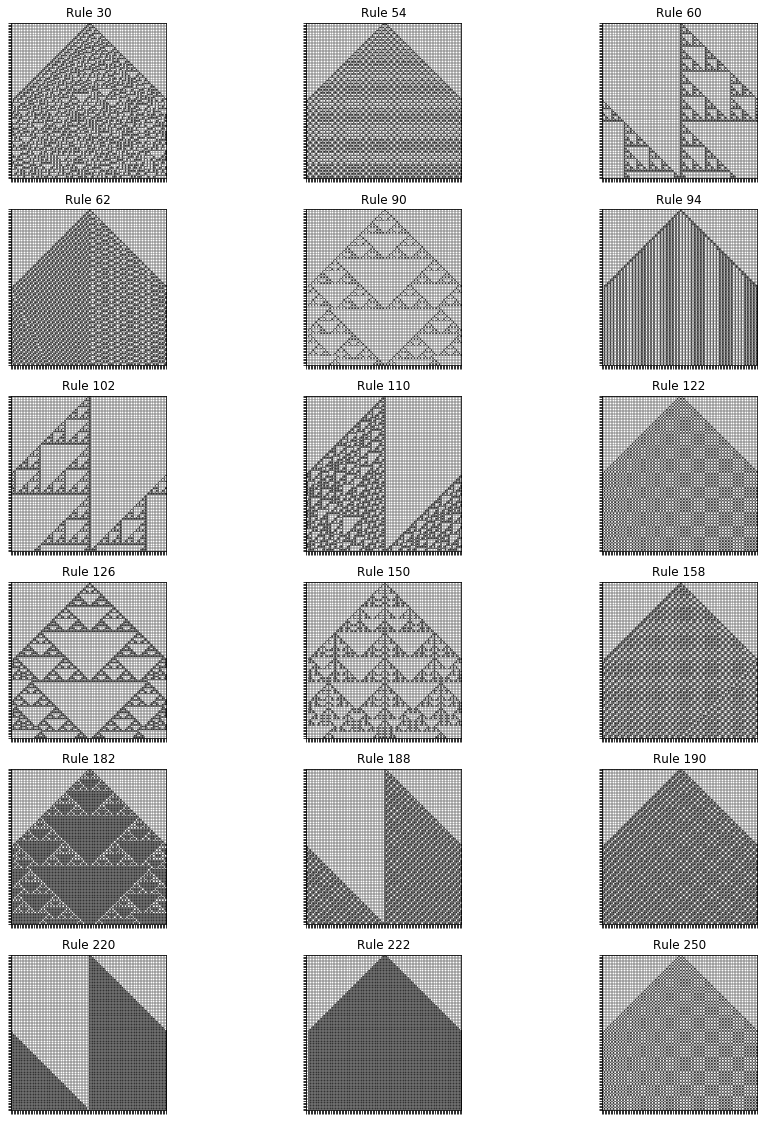

In [2]:
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]

make_plots(rules, 100, 100)